In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold,train_test_split
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading dataset
file_path='housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)

#Dataset visualization
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:

# Split features (X) and target variable (y)
X = data.drop('MEDV', axis=1)
X = sm.add_constant(X)
y = data['MEDV']

# Concatenate features and target variable into a single dataset
dataset = pd.concat([X, y], axis=1)

# Split training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print dataset description
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<ipython-input-5-6a1c8bb496df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MEDV'], rug=True) #plot MEDV


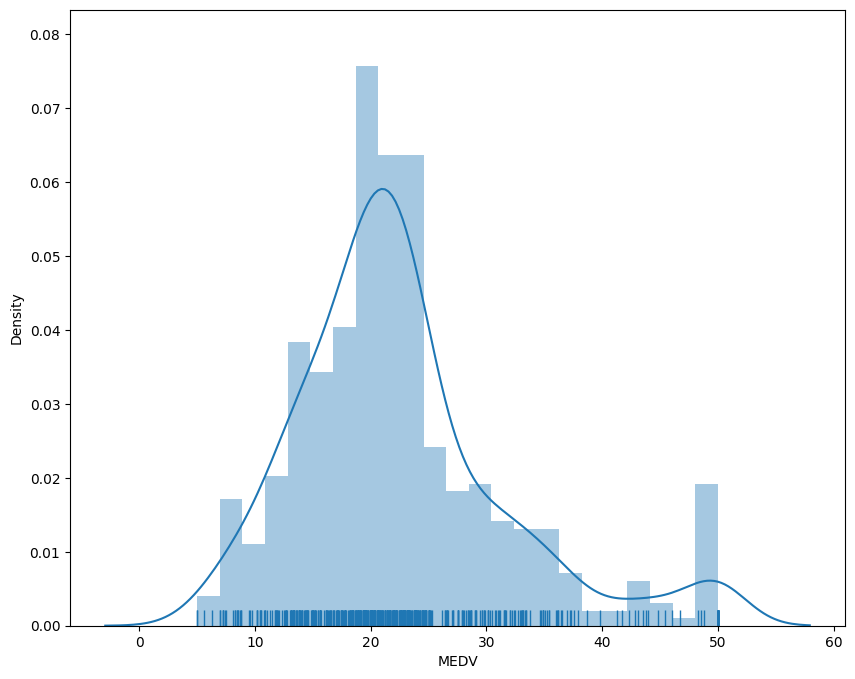

In [5]:
plt.figure(figsize=(10, 8)) #size of figure
sns.distplot(dataset['MEDV'], rug=True) #plot MEDV
plt.show()

<ipython-input-6-1cade0396223>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dataset.corr(), dtype=np.bool)


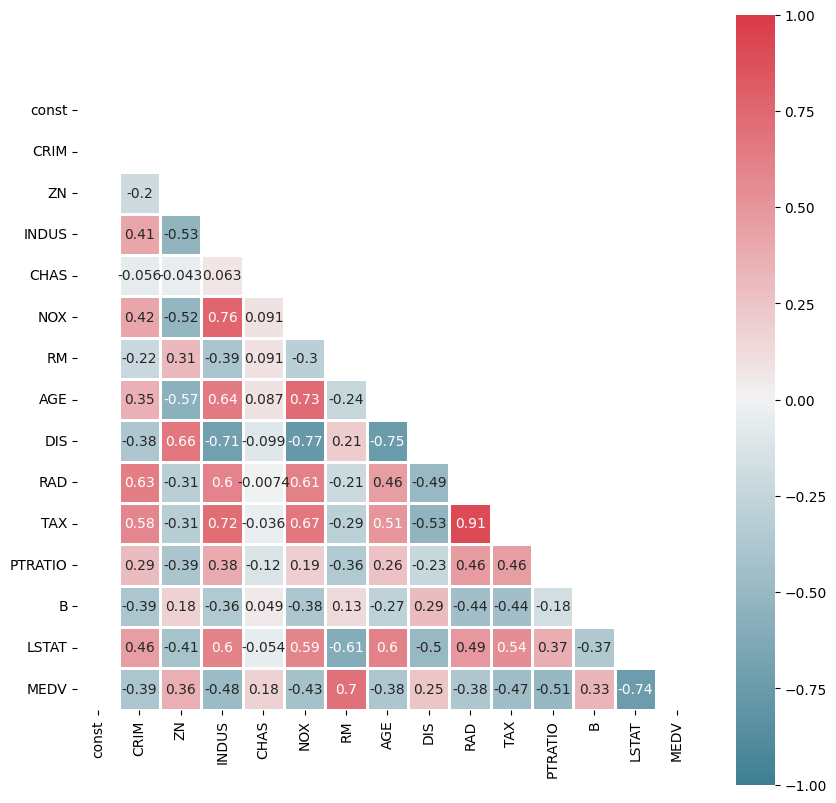

In [6]:
#to get the correlation matrix
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, square=True, mask=mask, cmap=cmap, linewidths=2)
plt.show()

In [7]:
exog = X_train.drop('const', axis=1) #training feature data
endog = y_train #training target data

# Fit initial model
model = sm.OLS(endog, exog).fit()

In [8]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              664.9
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                   2.95e-257
Time:                        10:24:46   Log-Likelihood:                         -1221.1
No. Observations:                 404   AIC:                                      2468.
Df Residuals:                     391   BIC:                                      2520.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
exog = X_train.drop('const', axis=1) #training feature data
endog = y_train #training target data
# Fit initial model
model = sm.OLS(endog, exog).fit()

# Calculate VIF
variables = model.model.exog
vif = np.array([variance_inflation_factor(variables, i) for i in range(variables.shape[1])])
vif[0] = 0

selected_features = []  # List to store selected features

while len(selected_features) < 5:
    # Find the id of the feature with smallest VIF value
    min_vif_id = np.argmin(vif)

    # Add the selected feature to the list
    selected_features.append(exog.columns[min_vif_id])

    # Delete that feature from exog dataset
    exog = exog.drop(exog.columns[min_vif_id], axis=1)

    # Fit model again
    model = sm.OLS(endog, exog).fit()
    # Calculate VIF
    variables = model.model.exog
    vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif[0] = 0

# Print the selected features
print("Selected Features:", selected_features)
# Create a new DataFrame with the selected features
selected_exog = X_train[selected_features]
# Fit the model with the selected features
selected_model = sm.OLS(endog, selected_exog).fit()
# Print the model summary
selected_model.summary()


Selected Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              537.6
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                   9.29e-175
Time:                        10:24:49   Log-Likelihood:                         -1442.1
No. Observations:                 404   AIC:                                      2894.
Df Residuals:                     399   BIC:                                      2914.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.3238      0.051     -6.376      0.000      -0.424      -0.224
ZN             0.1544      0.020      7.591      0.000       0.114       0.194
INDUS         -0.7171      0.100     -7.158      0.000      -0.914      -0.520
CHAS           4.4460      1.720      2.585      0.010       1.064       7.828
NOX           51.6614      2.321     22.263      0.000      47.099      56.223
==============================================================================
Omnibus:                       65.994   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.751
Skew:                           0.906   Prob(JB):                     2.99e-28
Kurtosis:                       5.061   Cond. No.                         140.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:

y_pred = selected_model.predict(selected_exog)
mae = mean_absolute_error(y_train, y_pred)
print("mean absolute error ",mae)


mean absolute error  6.249333058827194


In [11]:
# Define the number of folds for cross-validation
n_folds = 5

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize the list to store selected features
selected_features = []

# Loop through each fold
for train_index, test_index in kf.split(X_train):
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    X_train_fold = X_train_fold.drop('const', axis=1)
    X_test_fold = X_test_fold.drop('const', axis=1)

    # Fit the initial model on the training data for the current fold
    model = sm.OLS(y_train_fold, X_train_fold).fit()

    # Calculate VIF for the initial model
    variables = model.model.exog
    vif = np.array([variance_inflation_factor(variables, i) for i in range(variables.shape[1])])
    vif[0] = 0

    # Loop until the desired number of features are selected
    while len(selected_features) < 5:
        # Find the id of the feature with the smallest VIF value
        min_vif_id = np.argmin(vif)

        # Add the selected feature to the list
        selected_features.append(X_train_fold.columns[min_vif_id])

        # Delete that feature from the training data for the current fold
        X_train_fold = X_train_fold.drop(X_train_fold.columns[min_vif_id], axis=1)

        # Fit the model again on the updated training data
        model = sm.OLS(y_train_fold, X_train_fold).fit()


        # Calculate VIF for the updated model
        variables = model.model.exog
        vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
        vif[0] = 0

    # Create a new DataFrame with the selected features for the current fold
    selected_exog = X_test_fold[selected_features]

    # Fit the model with the selected features on the testing data for the current fold
    selected_model = sm.OLS(y_test_fold, selected_exog).fit()

    # Print the model summary for the current fold
    print("\nSelected Features:", selected_features)

    y_pred = selected_model.predict(selected_exog)
    mae = mean_absolute_error(y_test_fold, y_pred)
    print("mean absolute error",mae)


    # Reset the selected_features list for the next fold
    selected_features = []




Selected Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']
mean absolute error 5.929961829966861

Selected Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']
mean absolute error 7.581947095018636

Selected Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']
mean absolute error 5.39793609453667

Selected Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']
mean absolute error 5.1701495960688595

Selected Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']
mean absolute error 6.8564206189313355
